In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


# Reporting Checklist

## Data Load stage
* Load in data files               ✅
* Get range of time series         ✅
* Add and run data 'fix' functions ✅ 5th April

## Outputs
* Template
    - Title page with report range and data types
    - Date
* Weekly aggregates
    - Temperature between 9am-5pm, temperature overnight (11pm-6am?)
    - Average humidity at these times as well
    - % of time Light > 0
* Daily graphs (try to fit one page per day) 

## Implementation
* Python module for processing BAX data with functions for
    - Reading in the data from a file (or set of files)
    - Calculating stats and aggregates over the data
    - Producing graphs for given time ranges


In [2]:
from datahandling import *
import numpy as np

In [3]:
df = readfile("./testdata/fetch.bax")

In [4]:
print(df.dtypes.index)
print(unique_sensors(df))
print(df[:1])

Index(['Name', 'RSSI', 'Type', 'SequenceNo', 'TransmitPower', 'Battery',
       'Humidity', 'Temp', 'Light', 'PIRCount', 'PIREnergy', 'Switch'],
      dtype='object')
['80418A51' '80524F69' '80B207A1' '80F82619']
                         Name  RSSI  Type SequenceNo  TransmitPower  Battery  \
DateTime                                                                       
2016-03-27 23:59:53  80418A51   -72     1        131             20     2671   

                     Humidity  Temp  Light  PIRCount  PIREnergy  Switch  
DateTime                                                                 
2016-03-27 23:59:53     39.53   126      0         0         53       1  


In [5]:
t_start, t_end = (df.index.min(), df.index.max())

print(str(t_start) +' to '+ str(t_end))

2016-03-27 23:59:53 to 2016-04-03 23:59:39


In [6]:
dfs=split_by_id(df)
names = unique_sensors(df)
dfs[names[0]][:5]

,Name,RSSI,Type,SequenceNo,TransmitPower,Battery,Humidity,Temp,Light,PIRCount,PIREnergy,Switch
DateTime,,,,,,,,,,,,
2016-03-27 23:59:53,80418A51,-72,1,131,20,2671,39.53,126,0,0,53,1
2016-03-28 00:00:23,80418A51,-72,1,132,20,2671,39.45,126,0,0,442,1
2016-03-28 00:00:52,80418A51,-72,1,133,20,2671,39.41,125,0,0,848,1
2016-03-28 00:01:21,80418A51,-72,1,134,20,2671,39.45,125,0,0,1254,1
2016-03-28 00:01:50,80418A51,-72,1,135,20,2671,39.49,125,0,0,1658,1


In [7]:
dfs=fix_humidity(dfs)
dfs=fix_temp(dfs)
dfs[list(dfs)[0]][:2]

,Name,RSSI,Type,SequenceNo,TransmitPower,Battery,Humidity,Temp,Light,PIRCount,PIREnergy,Switch
DateTime,,,,,,,,,,,,
2016-03-27 23:59:53,80418A51,-72,1,131,20,2671,39.53,12.6,0,0,53,1
2016-03-28 00:00:23,80418A51,-72,1,132,20,2671,39.45,12.6,0,0,442,1


In [8]:
dfs=diff_pir(dfs)

(0, 10)

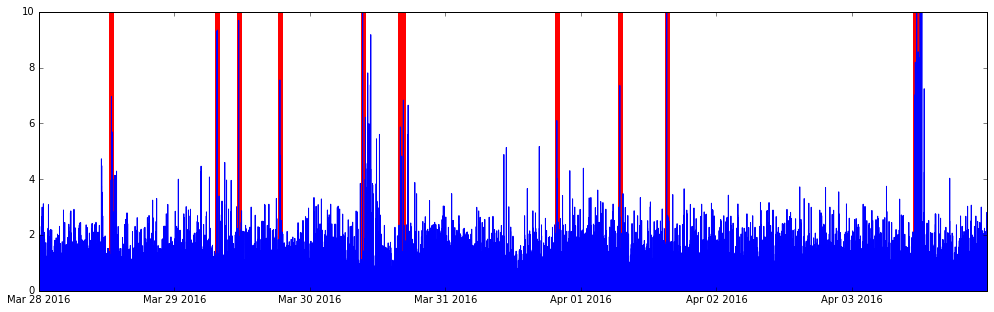

In [9]:
d=dfs['80418A51']

figsize(17,5)
plot(d['PIRDiff'])
#plot(d['PIRStd'])
vlines(d.loc[:,'Event'].index, [0], d.loc[:,'Event'].values*20, colors=['red'], lw=5)
ylim(0,10)

In [10]:
d[:4]
#list(dfs)[0] for first

,Name,RSSI,Type,SequenceNo,TransmitPower,Battery,Humidity,Temp,Light,PIRCount,PIREnergy,Switch,Event,PIRDiff
DateTime,,,,,,,,,,,,,,
2016-03-27 23:59:53,80418A51,-72,1,131,20,2671,39.53,12.6,0,0,53,1,NaN,NaN
2016-03-28 00:00:23,80418A51,-72,1,132,20,2671,39.45,12.6,0,0,442,1,NaN,NaN
2016-03-28 00:00:52,80418A51,-72,1,133,20,2671,39.41,12.5,0,0,848,1,NaN,1.033333
2016-03-28 00:01:21,80418A51,-72,1,134,20,2671,39.45,12.5,0,0,1254,1,NaN,0.000000


In [11]:
(d.loc[:,['Event']][d['Event'] == True].astype(float) *10)[:4]

,Event
DateTime,
2016-03-28 12:51:08,10
2016-03-29 07:31:02,10
2016-03-29 07:37:24,10
2016-03-29 11:22:38,10


In [14]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist
import matplotlib.pyplot as plt

plt.style.use('seaborn-bright')#'fivethirtyeight')
pylab.rcParams['figure.figsize'] = (17, 5)

# Tableau20 colours
global_colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728", 
                 "#ff9896", "#9467bd", "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", 
                 "#7f7f7f", "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "9edae5"]

def graph(x_data, y_data, x_label='', y_labels=None, override_label=None, colors=global_colors, plot_functions=None, 
          separate=None, title=None, legend=None, twin_x=None, twin_y=None, savepng=None):
    
    # Return orientation (left or right) for in-order axis
    def orient(i,flip=0):
        return ("right" if (i+flip)%2 else "left")

    # Offset mapping: 
    # 0=>0, 1=>0, 2=>-50, 3=>50, 4=>-100, 5=>100, 6=>-150, etc
    def offset(i):
        return (offset.multiplier * (i//2)) * ((i%2) + (((i+1)%2))*-1)
    offset.multiplier = 60
    
    host = host_subplot(111, axes_class=mpl_toolkits.axisartist.Axes)
    host.axis["top"].toggle(all=False)
    
    # Iterate series
    for i in range(0, len(y_data)):
        if twin_x:
            ax = (host if (i==0) else host.twinx())
        elif twin_x and twin_y:
            ax = (host if (i==0) else host.twinx().twiny())
        else:
            ax = host
        
        label = y_labels[i] if y_labels is not None else ''
        
        if i>1 and not twin_y:
            new_ax = ax.get_grid_helper().new_fixed_axis
            ax.axis[orient(i)] = new_ax(loc=orient(i), axes=ax, offset=(offset(i), 0))
            ax.axis[orient(i)].toggle(all=True) 
            ax.axis[orient(i,1)].toggle(all=False)
        
        if plot_functions and plot_functions[i] == 'vlines':
            p = ax.vlines(x_data[i] if type(x_data) is list else x_data, 
                          [0], 
                          y_data[i]*20, 
                          label=label, 
                          color=colors[i%len(colors)], 
                          zorder=-1, lw=5)
            
            ax.set_ylim(0,1)
            ax.axis[orient(i)].toggle(all=False)
            
        else:
            p, = ax.plot(x_data[i] if type(x_data) is list else x_data, 
                         y_data[i], 
                         label=label, 
                         color=colors[i%len(colors)])
            
            for t in ax.get_yticklabels():             # This doesn't work and I don't know why.
                t.set_color(colors[i%len(colors)])     #p.get_color())          
        
        
        if not twin_y:
            ax.axis[orient(i)].label.set_color(colors[i%len(colors)])     #p.get_color())
            ax.set_ylabel(label)
     

    if title:
        t = plt.suptitle(title)
        t.set_fontsize(t.get_fontsize()+8)
    
    if x_label:
        host.set_xlabel(x_label)
        
    if override_label:
        host.set_ylabel(override_label)
    
    if legend:
        plt.legend()
    
    plt.draw()
    plt.show()

    if savepng:
        plt.savefig("%.png" % title)

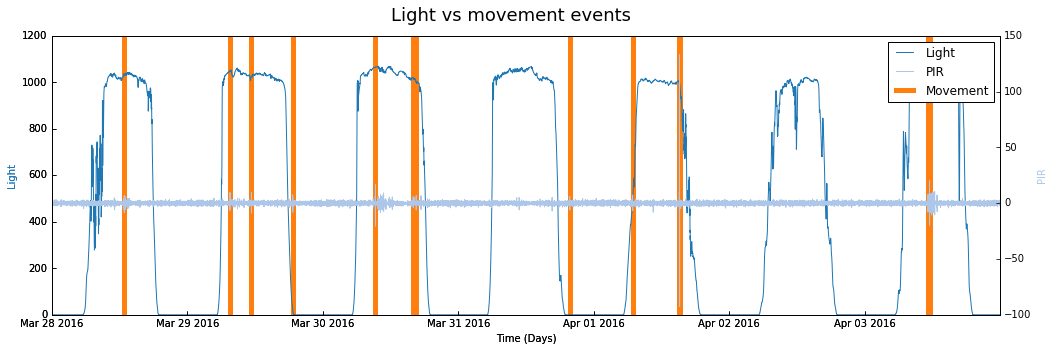

In [15]:
x_data, light = list(zip(*d.loc[t_start:t_end, ['Light']].to_records().tolist()))
x_data, diff = list(zip(*d.loc[t_start:t_end, ['PIRDiff']].to_records().tolist()))
x_data, evt = list(zip(*(d.loc[t_start:t_end, ['Event']]).to_records().tolist()))

data =[light, diff, evt]
labels=["Light", "PIR", "Movement"]
func = ['plot', 'plot', 'vlines']
graph(x_data, y_data=data, x_label="Time (Days)", y_labels=labels, title="Light vs movement events", plot_functions=func, twin_x=True, legend=True)#, ['Light', 'Diff', 'Event'])

# Todo: same x scale option

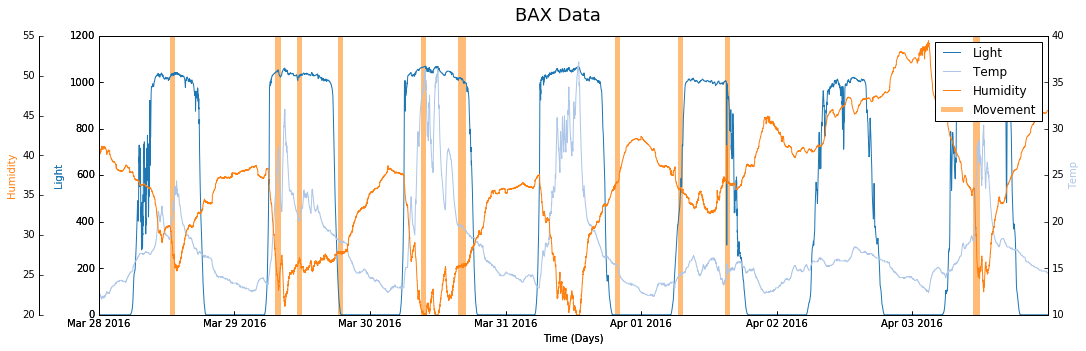

In [16]:
x_data, temp = list(zip(*d.loc[t_start:t_end, ['Temp']].to_records().tolist()))
x_data, humid = list(zip(*d.loc[t_start:t_end, ['Humidity']].to_records().tolist()))
x_data, light = list(zip(*d.loc[t_start:t_end, ['Light']].to_records().tolist()))
x_data, evts = list(zip(*(d.loc[t_start:t_end, ['Event']]).to_records().tolist()))

y_data = [ light   , temp   , humid      , evts       ]
labels = [ "Light" , "Temp" , "Humidity" , "Movement" ]
funcs =  [ "plot"  , "plot" , "plot"     , "vlines"   ]
graph(x_data, y_data, "Time (Days)", labels, title='BAX Data', plot_functions=funcs, twin_x=True, legend=True)


18923 4 ['80418A51', '80F82619', '80B207A1', '80524F69']


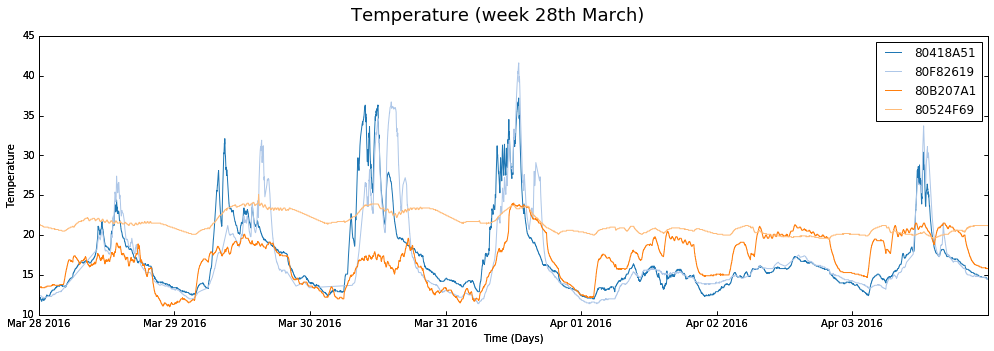

In [17]:
x_data, y_data = ([],[])
for i in dfs:
    time, temp = list(zip(*dfs[i].loc[t_start:t_end, ['Temp']].to_records().tolist()))
    x_data.append(time)
    y_data.append(temp)

series_labels = list(dfs.keys())

print(len(y_data[0]), len(x_data), series_labels)
graph(x_data, y_data, "Time (Days)", series_labels, override_label="Temperature", title='Temperature (week 28th March)', twin_y=True, legend=True)